In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def get_indicator(ind = 'health'):
    df = pd.read_csv(f'World-Bank-Data-by-Indicators-master/{ind}/{ind}.csv')
    return df

df = get_indicator('economy-and-growth')
# Filter for rows with non-null GDP data
df_gdp = df[df['average_value_GDP (current US$)'].notna()]

# Get min and max year for each country that has GDP data
year_ranges = df_gdp.groupby('Country Code').agg({'Year': ['min', 'max']})
year_ranges.columns = ['min_year', 'max_year']

# Sort by max year ascending and min year descending for first list
max_year_asc = year_ranges.sort_values('max_year', ascending=True)

# Sort by min year descending for second list
min_year_desc = year_ranges.sort_values('min_year', ascending=False)

# Display top 5 countries from each list
print("Top 5 countries with lowest max year (with GDP data):")
print(max_year_asc.head())

print("\nTop 5 countries with highest min year (with GDP data):")
print(min_year_desc.head())



Top 5 countries with lowest max year (with GDP data):
              min_year  max_year
Country Code                    
NCL               1965      2000
PYF               1965      2000
SYR               1960      2007
CHI               1998      2007
ERI               1992      2011

Top 5 countries with highest min year (with GDP data):
              min_year  max_year
Country Code                    
SXM               2011      2018
CUW               2011      2019
NRU               2010      2019
SSD               2008      2015
CYM               2006      2019


In [27]:
min_year = 1971
max_year = 2019

# Get GDP values for min and max years
gdp_ratios = []
missing_data = []

for country_code in df['Country Code'].unique():
    # Get GDP data for this country in min and max years
    min_year_gdp = df[(df['Country Code'] == country_code) & 
                      (df['Year'] == min_year)]['average_value_GDP (current US$)'].values
    max_year_gdp = df[(df['Country Code'] == country_code) & 
                      (df['Year'] == max_year)]['average_value_GDP (current US$)'].values
    
    # Get country name
    country_name = df[df['Country Code'] == country_code]['Country Name'].iloc[0]
    
    if len(min_year_gdp) > 0 and len(max_year_gdp) > 0:
        ratio = max_year_gdp[0] / min_year_gdp[0]
        if not np.isnan(ratio):
            gdp_ratios.append((country_code, country_name, ratio))
        else:
            missing_data.append(country_name)
    else:
        missing_data.append(country_name)

# Sort GDP ratios by ratio value in descending order
sorted_ratios = sorted(gdp_ratios, key=lambda x: x[2], reverse=True)

print(f"\nSummary:")
print(f"Number of countries with GDP data for both {min_year} and {max_year}: {len(gdp_ratios)}")
print(f"Number of countries missing GDP data: {len(missing_data)}")

print(f"\nTop GDP Growth Ratios ({max_year}/{min_year}):")
for code, name, ratio in sorted_ratios:
    print(f"{name} ({code}): {ratio:.2f}x growth")



Summary:
Number of countries with GDP data for both 1971 and 2019: 162
Number of countries missing GDP data: 103

Top GDP Growth Ratios (2019/1971):
Qatar (QAT): 453.54x growth
Oman (OMN): 253.58x growth
Equatorial Guinea (GNQ): 175.79x growth
Korea, Rep. (KOR): 166.28x growth
Singapore (SGP): 165.38x growth
Botswana (BWA): 144.07x growth
China (CHN): 143.08x growth
East Asia & Pacific (IDA & IBRD countries) (TEA): 125.91x growth
East Asia & Pacific (excluding high income) (EAP): 125.89x growth
Indonesia (IDN): 119.90x growth
Other small states (OSS): 116.42x growth
Saudi Arabia (SAU): 110.37x growth
Malaysia (MYS): 85.92x growth
Hong Kong SAR, China (HKG): 81.10x growth
Ireland (IRL): 78.17x growth
Thailand (THA): 73.80x growth
Seychelles (SYC): 71.99x growth
Brunei Darussalam (BRN): 68.19x growth
Jordan (JOR): 65.62x growth
Late-demographic dividend (LTE): 60.39x growth
East Asia & Pacific (EAS): 59.45x growth
Costa Rica (CRI): 59.37x growth
Small states (SST): 58.81x growth
Iraq (I

In [31]:
df = get_indicator('education')
df

,Country Name,Country Code,Year,average_value_Adolescents out of school (% of lower secondary school age),"average_value_Adolescents out of school, female (% of female lower secondary school age)","average_value_Adolescents out of school, male (% of male lower secondary school age)","average_value_Current education expenditure, primary (% of total expenditure in primary public institutions)","average_value_Current education expenditure, secondary (% of total expenditure in secondary public institutions)","average_value_Current education expenditure, tertiary (% of total expenditure in tertiary public institutions)","average_value_Current education expenditure, total (% of total expenditure in public institutions)",...,"average_value_School enrollment, tertiary, male (% gross)","average_value_Secondary education, teachers","average_value_Secondary education, teachers (% female)","average_value_Secondary education, teachers, female","average_value_Secondary education, vocational pupils","average_value_Secondary education, vocational pupils (% female)","average_value_Tertiary education, academic staff (% female)",average_value_Trained teachers in secondary education (% of total teachers),"average_value_Trained teachers in secondary education, female (% of female teachers)","average_value_Trained teachers in secondary education, male (% of male teachers)"
0,Afghanistan,AFG,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9716.0,7.99712,NaN,NaN,NaN,NaN
2,Africa Western and Central,AFW,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,2008,NaN,NaN,NaN,90.057831,92.859421,92.64933,88.801659,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,AUS,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.279579,74041.0,46.54583,34463.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15613,Latin America & the Caribbean (IDA & IBRD coun...,TLA,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.769300,795391.1,50.45696,401330.2,2474127.0,51.04522,23.35969,NaN,NaN,NaN
15614,Tonga,TON,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15615,St. Vincent and the Grenadines,VCT,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15616,Vietnam,VNM,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df = pd.read_csv('CCRB-Complaint-Data_202007271729/allegations_202007271729.csv')
df

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)


              U.S. State  % change in abortion rate, 2017-2020   
0                Alabama                                    -6  \
1                 Alaska                                     0   
2                Arizona                                     1   
3               Arkansas                                     2   
4             California                                    17   
5               Colorado                                     3   
6            Connecticut                                    -6   
7               Delaware                                    -5   
8   District of Columbia                                    62   
9                Florida                                     6   
10               Georgia                                    12   
11                Hawaii                                     1   
12                 Idaho                                    23   
13              Illinois                                    28   
14        

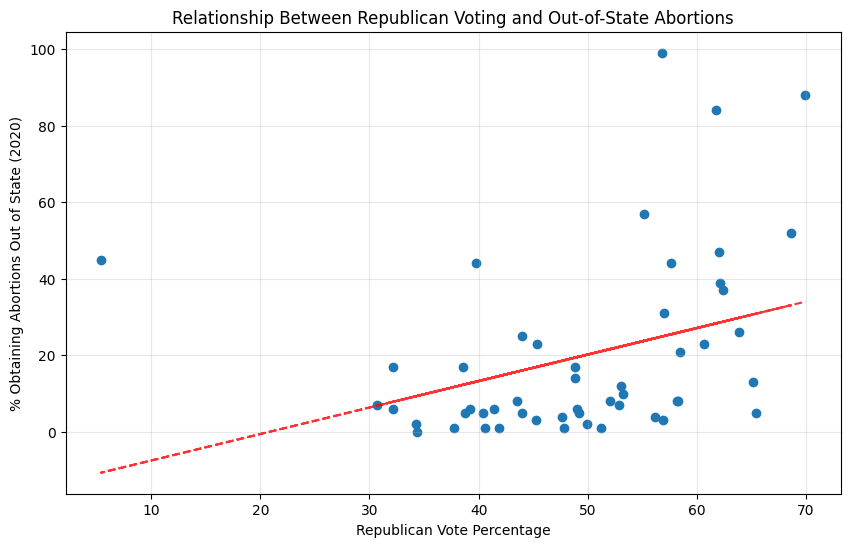

In [40]:
# Install openpyxl first since it's required for reading Excel files
# Read the data files
abortion = pd.read_excel('GuttmacherInstituteAbortionDataByState.xlsx')
abortion['State'] = abortion['U.S. State']
party = pd.read_csv('party.csv')
print(abortion)

# Convert percentage strings to floats
party['Republican Vote Percentage'] = party['Republican Vote Percentage'].str.rstrip('%').astype(float)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(party['Republican Vote Percentage'], 
           abortion['% of residents obtaining abortions who traveled out of state for care, 2020'])

plt.xlabel('Republican Vote Percentage')
plt.ylabel('% Obtaining Abortions Out of State (2020)')
plt.title('Relationship Between Republican Voting and Out-of-State Abortions')

# Add a trend line
z = np.polyfit(party['Republican Vote Percentage'],
               abortion['% of residents obtaining abortions who traveled out of state for care, 2020'], 1)
p = np.poly1d(z)
plt.plot(party['Republican Vote Percentage'], p(party['Republican Vote Percentage']), "r--", alpha=0.8)

plt.grid(True, alpha=0.3)
plt.show()

#Abortions are more difficult to get in red states

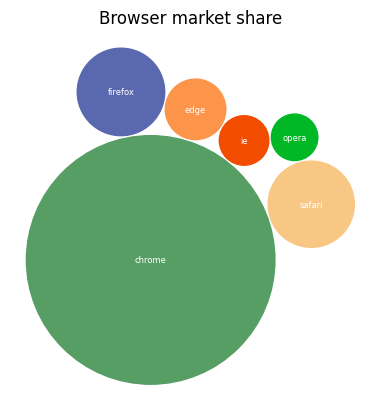

In [49]:
import matplotlib.pyplot as plt
import numpy as np

browser_market_share = {
    'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
    'market_share': [8.61, 69.55, 8.36, 4.12, 2.76, 2.43],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center',
                    color='white', fontsize=6)


bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Browser market share')

plt.show()

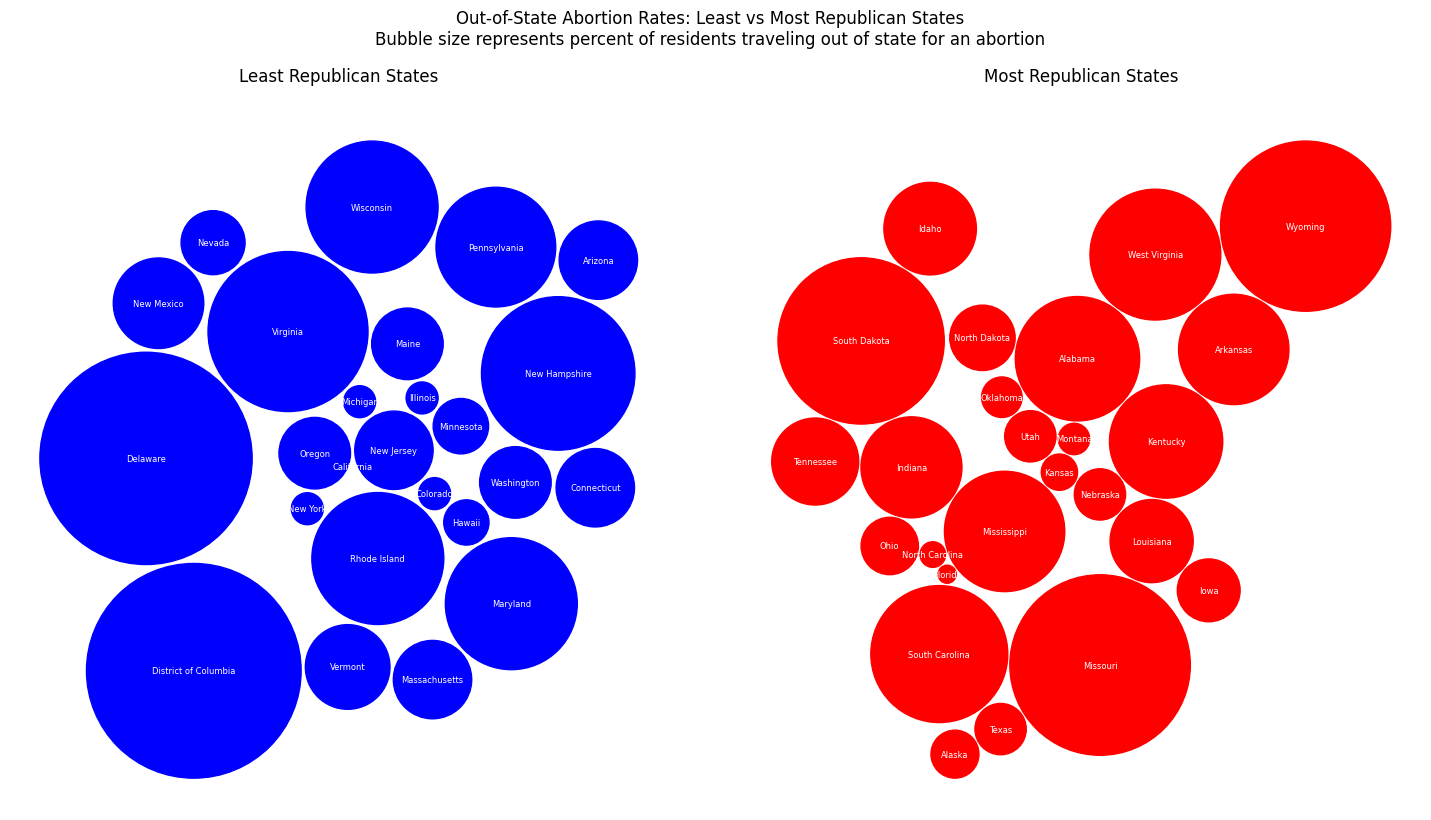

In [68]:
# Sort states by Republican voting percentage
sorted_states = party.sort_values('Republican Vote Percentage')

# Split into least and most Republican states
least_republican = sorted_states.head(25)
most_republican = sorted_states.tail(25)

# Merge with abortion data
least_rep_data = pd.merge(least_republican, abortion, left_on='State', right_on='State')
most_rep_data = pd.merge(most_republican, abortion, left_on='State', right_on='State')

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), subplot_kw=dict(aspect="equal"))

# Create bubble chart for least Republican states
bubble_chart1 = BubbleChart(area=least_rep_data['% of residents obtaining abortions who traveled out of state for care, 2020'].values,
                           bubble_spacing=0.15)
bubble_chart1.collapse()
bubble_chart1.plot(
    ax1, 
    least_rep_data['State'].values,
    ['blue'] * len(least_rep_data)
)
ax1.axis("off")
ax1.relim()
ax1.autoscale_view()
ax1.set_title('Least Republican States', pad=20)

# Create bubble chart for most Republican states
bubble_chart2 = BubbleChart(area=most_rep_data['% of residents obtaining abortions who traveled out of state for care, 2020'].values,
                           bubble_spacing=0.15)
bubble_chart2.collapse()
bubble_chart2.plot(
    ax2,
    most_rep_data['State'].values, 
    ['red'] * len(most_rep_data)
)
ax2.axis("off")
ax2.relim()
ax2.autoscale_view()
ax2.set_title('Most Republican States', pad=20)

plt.suptitle('Out-of-State Abortion Rates: Least vs Most Republican States\nBubble size represents percent of residents traveling out of state for an abortion', y=1.02)
plt.tight_layout()
plt.savefig('plots/nodiff.png', dpi = 300)
plt.show()


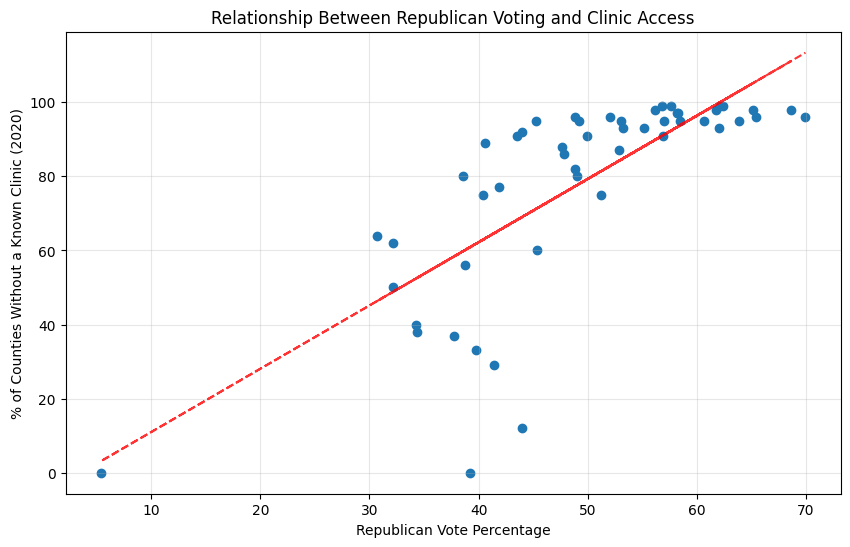

In [56]:
# Install openpyxl first since it's required for reading Excel files
# Read the data files
abortion = pd.read_excel('GuttmacherInstituteAbortionDataByState.xlsx')
abortion['State'] = abortion['U.S. State']
party = pd.read_csv('party.csv')

# Convert percentage strings to floats
party['Republican Vote Percentage'] = party['Republican Vote Percentage'].str.rstrip('%').astype(float)

# Merge the dataframes on State to ensure matching states
merged_data = pd.merge(party, abortion, on='State')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Republican Vote Percentage'], 
           merged_data['% of counties without a known clinic, 2020'])

plt.xlabel('Republican Vote Percentage')
plt.ylabel('% of Counties Without a Known Clinic (2020)')
plt.title('Relationship Between Republican Voting and Clinic Access')

# Add a trend line
z = np.polyfit(merged_data['Republican Vote Percentage'],
               merged_data['% of counties without a known clinic, 2020'], 1)
p = np.poly1d(z)
plt.plot(merged_data['Republican Vote Percentage'], p(merged_data['Republican Vote Percentage']), "r--", alpha=0.8)

plt.grid(True, alpha=0.3)
plt.show()

# Counties in red states are more likely to lack abortion clinics

In [ ]:
# Sort states by Republican voting percentage
sorted_states = party.sort_values('Republican Vote Percentage')

# Split into least and most Republican states
least_republican = sorted_states.head(25)
most_republican = sorted_states.tail(25)

# Merge with abortion data
least_rep_data = pd.merge(least_republican, abortion, left_on='State', right_on='State')
most_rep_data = pd.merge(most_republican, abortion, left_on='State', right_on='State')

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), subplot_kw=dict(aspect="equal"))

# Create bubble chart for least Republican states
bubble_chart1 = BubbleChart(area=least_rep_data['% of residents obtaining abortions who traveled out of state for care, 2020'].values,
                           bubble_spacing=0.1)
bubble_chart1.collapse()
bubble_chart1.plot(
    ax1, 
    least_rep_data['State'].values,
    ['blue'] * len(least_rep_data)
)
ax1.axis("off")
ax1.relim()
ax1.autoscale_view()
ax1.set_title('Least Republican States')

# Create bubble chart for most Republican states
bubble_chart2 = BubbleChart(area=most_rep_data['% of residents obtaining abortions who traveled out of state for care, 2020'].values,
                           bubble_spacing=0.1)
bubble_chart2.collapse()
bubble_chart2.plot(
    ax2,
    most_rep_data['State'].values, 
    ['red'] * len(most_rep_data)
)
ax2.axis("off")
ax2.relim()
ax2.autoscale_view()
ax2.set_title('Most Republican States')

plt.suptitle('Out-of-State Abortion Rates: Least vs Most Republican States\nBubble size represents percent of residents traveling out of state for an abortion')
plt.tight_layout()
plt.savefig('plots/nodiff.png', dpi = 300)
plt.show()


In [58]:
abortion.sort_values('% of residents obtaining abortions who traveled out of state for care, 2020', ascending=False)

,U.S. State,"% change in abortion rate, 2017-2020","% change in the no. of abortion clinics, 2017-2020","% change in the no. of abortion providers, 2014-2017","% of all U.S. abortions, by state of occurrence, 2020","% of counties without a known abortion provider, 2014","% of counties without a known clinic, 2020","% of residents obtaining abortions who traveled out of state for care, 2020","% of women aged 15-44 living in a county without a clinic, 2020","% of women aged 15-44 living in a county without an abortion provider, 2014",...,"No. of abortions per 1,000 women aged 15–44, by state of residence, 2020","No. of abortions, by state of occurrence, 2020","No. of abortions, by state of residence, 2020","No. of federally funded abortions, 2010","No. of state funded abortions, 2010","Reported public expenditures for abortions (in 000s of dollars), federal, 2015","Reported public expenditures for abortions (in 000s of dollars), state, 2015","Total no. of publicly funded abortions , 2010","Total reported public expenditures for abortions (in 000s of dollars), 2015",State
25,Missouri,-98,-67,100,0.0,99,99,99,94,94,...,9.9,170,11710,0,0,15,0,0,15,Missouri
50,Wyoming,-31,0,-33,0.0,96,96,88,96,96,...,6.4,100,700,0,0,0,0,0,0,Wyoming
41,South Dakota,-74,0,0,0.0,98,98,84,76,77,...,4.1,130,680,0,unavailable,0,nr,unavailable,nr,South Dakota
40,South Carolina,0,-25,43,0.6,91,93,57,71,65,...,11.9,5300,11830,9,0,0,0,9,0,South Carolina
48,West Virginia,-30,0,-40,0.1,95,98,52,90,76,...,5.7,990,1780,0,1111,0,375,1111,375,West Virginia
0,Alabama,-6,0,-22,0.6,91,93,47,59,58,...,9.5,5700,9060,9,0,22,0,9,22,Alabama
8,District of Columbia,62,0,-11,1.0,0,0,45,0,0,...,26.1,9410,5010,0,0,0,0,0,nr,District of Columbia
24,Mississippi,42,0,50,0.4,99,99,44,92,91,...,9.9,3560,5760,0,0,0,0,0,0,Mississippi
7,Delaware,-5,-25,0,0.2,33,33,44,19,18,...,15.8,1830,2870,1,unavailable,"<1,000",0,1,"<1,000",Delaware
17,Kentucky,26,100,0,0.4,98,99,39,82,74,...,6.7,4080,5690,0,0,0,0,0,0,Kentucky


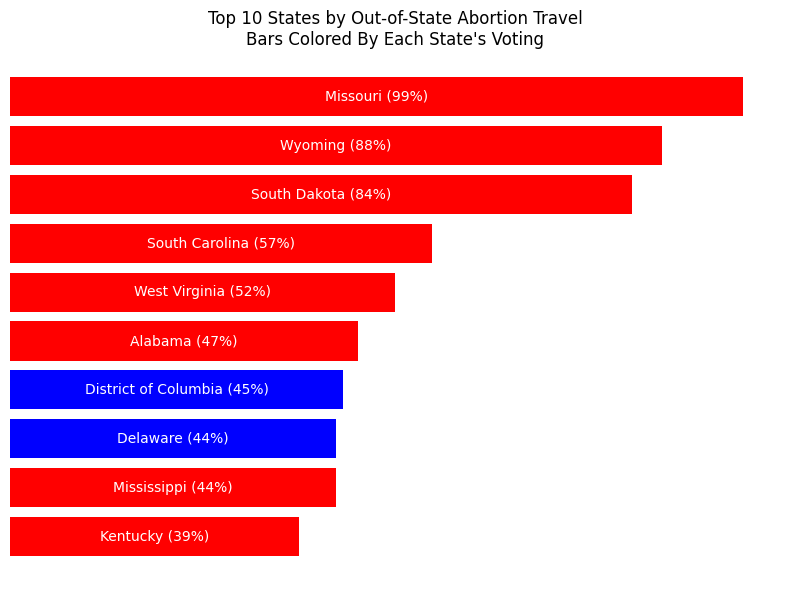

In [63]:
# Get top 10 states by out of state abortion percentage
top_10_states = abortion.nlargest(10, '% of residents obtaining abortions who traveled out of state for care, 2020')

# Merge with party data to get Republican voting percentages
party_data = pd.read_csv('party.csv')
party_data['Republican Vote Percentage'] = party_data['Republican Vote Percentage'].str.rstrip('%').astype(float)
top_10_with_party = pd.merge(top_10_states, party_data, on='State')

# Create color list based on Republican percentage
colors = ['red' if x >= 50 else 'blue' for x in top_10_with_party['Republican Vote Percentage']]

# Create horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(top_10_with_party['State'][::-1], 
                top_10_with_party['% of residents obtaining abortions who traveled out of state for care, 2020'][::-1],
                color=colors[::-1])

# Remove outer box
plt.box(False)

# Remove y-axis ticks and labels since we'll annotate the bars
plt.yticks([])

# Remove x-axis
plt.xticks([])

plt.title("Top 10 States by Out-of-State Abortion Travel\nBars Colored By Each State's Voting")

# Add state names and percentages inside bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    state = top_10_with_party['State'].iloc[::-1].iloc[i]
    plt.text(width/2, bar.get_y() + bar.get_height()/2,
             f'{state} ({int(width)}%)',
             ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig('plots/top10_travel.png', dpi=300, bbox_inches='tight')
plt.show()
